# Face mask detection 

### Contents

* [Step 0](#step0): Import libraries
* [Step 1](#step1): Load and explore data
* [Step 2](#step2): Load data using Keras function
* [Step 3](#step3): Analyze training data
* [Step 4](#step4): Build the model
* [Step 5](#step5): Fit the model
* [Step 6](#step6): Evaluate the model

<a id='step0'></a>
## Step 0: Import libraries

In [1]:
import PIL.Image
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import kagglehub
import pathlib

import numpy as np

<a id='step1'></a>
## Step 1: Load and explore data 

In [ ]:
# Download latest version
#path = kagglehub.dataset_download("ashishjangra27/face-mask-12k-images-dataset")

#print("Path to dataset files:", path)


In [2]:
path = 'C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1'

In [3]:
path = pathlib.Path(path).with_suffix('')/'Face Mask Dataset'

In [6]:
list(path.glob("*/*/*.png"))

[WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1163.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1174.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1175.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1203.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1361.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset/Test/WithMask/1362.png'),
 WindowsPath('C:/Users/ronal/.cache/kagglehub/datasets/ashishjangra27/face-m

In [7]:
len(list(path.glob("*/*/*.png")))

11792

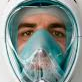

In [8]:
mask = list(path.glob("Train/WithMask/*"))

PIL.Image.open(str(mask[0]))

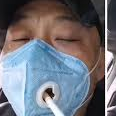

In [9]:
PIL.Image.open(str(mask[100]))

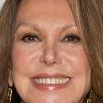

In [10]:
no_mask = list(path.glob("Train/WithoutMask/*"))

PIL.Image.open(str(no_mask[0]))

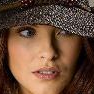

In [11]:
PIL.Image.open(str(no_mask[100]))

<a id='step2'></a>
## Step 2: Load data using Keras function

In [4]:
batch_size = 32
img_height = 128
img_width = 128

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path/'Train',
  seed=11,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 2 classes.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path/'Validation',
  seed=11,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 2 classes.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  path/'Test',
  seed=11,
  batch_size=32,
  image_size=(img_height, img_width))


Found 992 files belonging to 2 classes.


<a id='step3'></a>
## Step 3: Analize training data

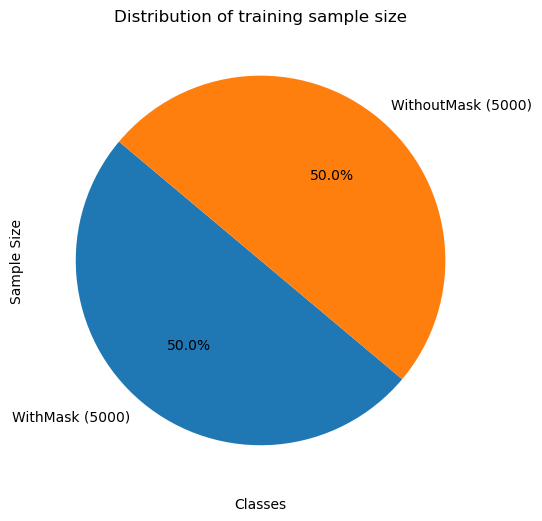

In [16]:

class_labels = train_ds.class_names
class_counts = [len(mask), len(no_mask)]  

labels = [f"{name} ({count})" for name, count in zip(class_labels, class_counts)]


plt.figure(figsize=(8, 6))
plt.pie( class_counts,labels=labels,autopct='%1.1f%%', startangle=140)
plt.xlabel('Classes')
plt.ylabel('Sample Size')
plt.title('Distribution of training sample size')
plt.show()


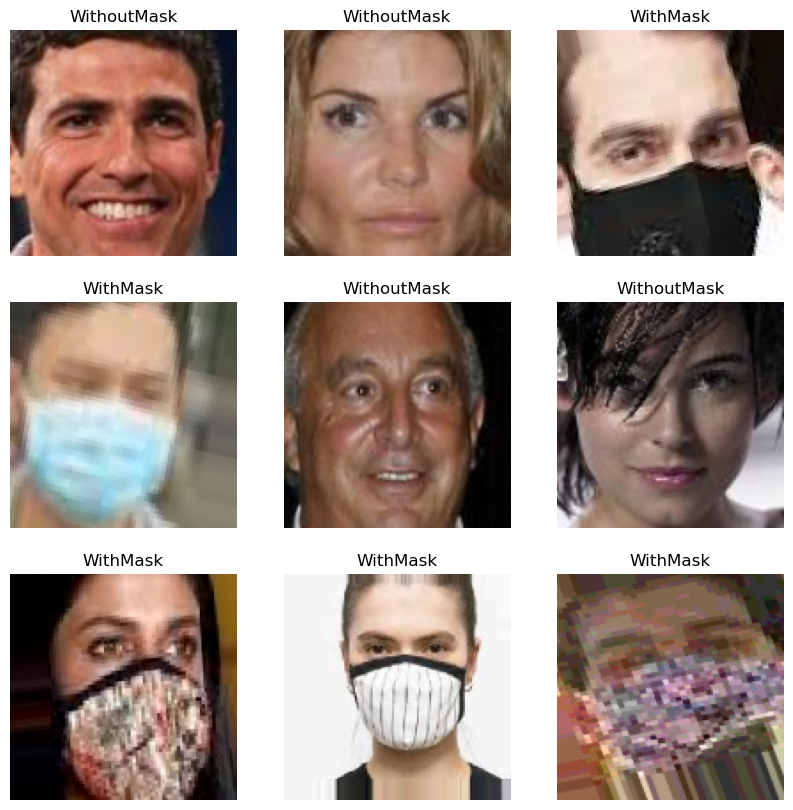

In [17]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_labels[labels[i]])
    plt.axis("off")

<a id='step4'></a>
## Step 4: Build the model

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [19]:
num_classes = len(class_labels)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\ronal\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,122 (8.09 MB)

 Trainable params: 2,121,122 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

<a id='step5'></a>
## Step 5: Fit the model

In [22]:
epochs=10
history = model.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=epochs
                    )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.9011 - loss: 0.2192 - val_accuracy: 0.9663 - val_loss: 0.0869
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.9853 - loss: 0.0394 - val_accuracy: 0.9887 - val_loss: 0.0270
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9909 - loss: 0.0260 - val_accuracy: 0.9912 - val_loss: 0.0285
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9933 - loss: 0.0195 - val_accuracy: 0.9950 - val_loss: 0.0180
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9937 - val_loss: 0.0207
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9937 - val_loss: 0.0162
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9959 - loss: 0.0098 - val_accuracy: 0.9962 - val_loss: 0.0072
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.9965 - loss: 0

<a id='step6'></a>
## Step 6: Evaluate the model

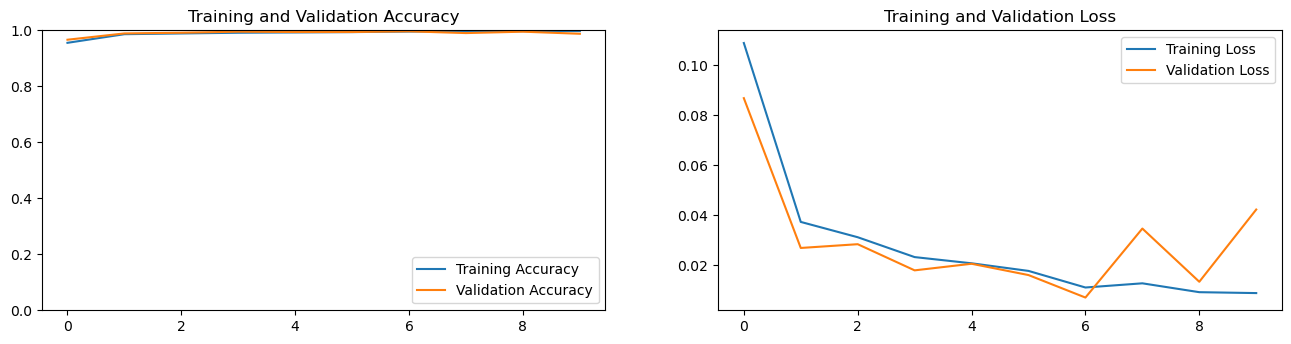

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds) 

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9799 - loss: 0.0646
Test Loss: 0.07204852253198624
Test Accuracy: 0.9798387289047241


<a id='step7'></a>
## Step 7: Visualize predictions and confidence

In [25]:
predictions = model.predict(test_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [8]:
from tensorflow.keras.models import load_model

model = load_model('facemask_model.keras')
predictions = model.predict(test_ds)

c:\Users\ronal\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [9]:
# Apply softmax to each prediction to convert logits to probabilities
probabilities = tf.nn.softmax(predictions, axis=1)

# Take the maximum confidence and compute the average
max_confidences = np.max(probabilities, axis=1)
average_confidence = np.mean(max_confidences)

print(f"Average confidence: {average_confidence:.2f}")

Average confidence: 0.99


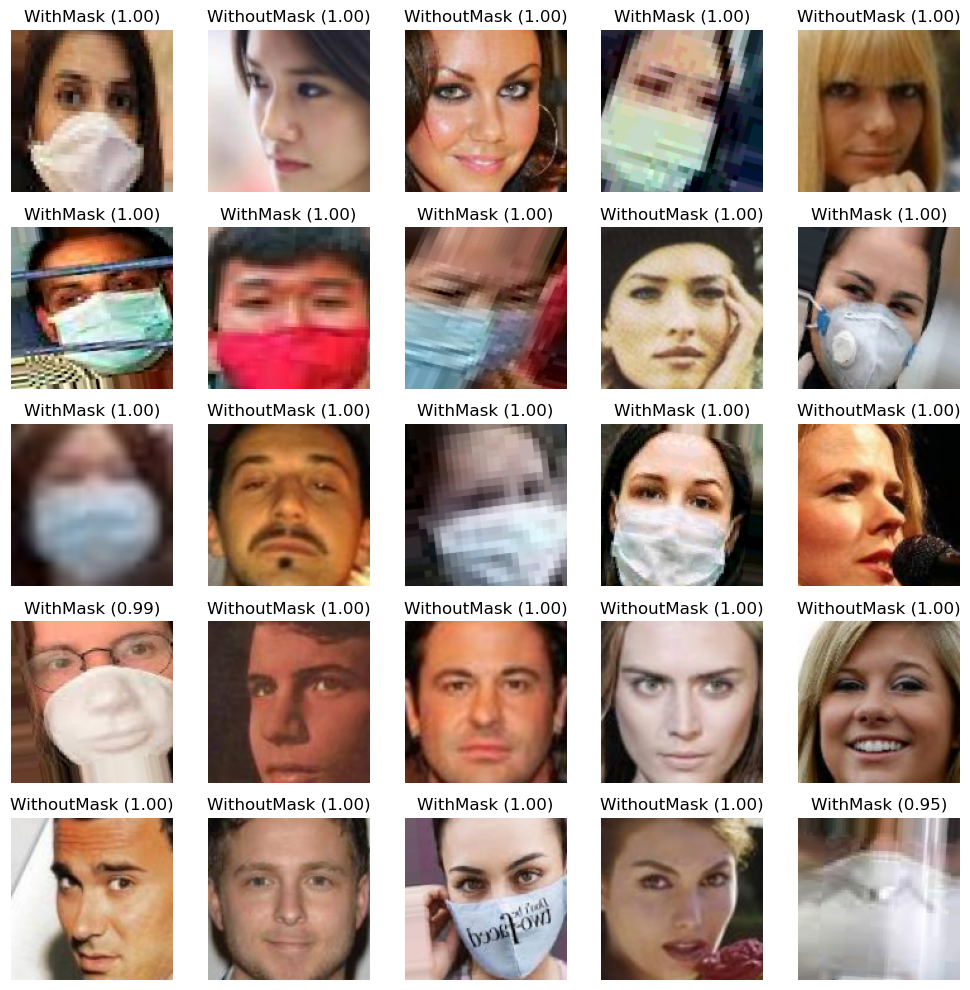

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(10, 10))

num_images_to_plot = 25  # Limit of images to display
current_plot = 0  # Counter for images displayed

for images, labels in test_ds.take(15):
    if current_plot >= num_images_to_plot:
        break  # Stop when the plot limit is reached

    # Get predictions for the current batch
    batch_predictions = model(images, training=False)

    # Loop over each image in the batch
    for image, prediction in zip(images, batch_predictions):
        if current_plot >= num_images_to_plot:
            break  # Stop if we have reached the plot limit

        # Prepare image and prediction details
        image = image.numpy().astype("uint8")
        prediction_score = tf.nn.softmax(prediction)
        predicted_label = class_labels[tf.argmax(prediction_score).numpy()]
        confidence = tf.reduce_max(prediction_score).numpy()

        # Plot image with label and confidence
        plt.subplot(5, 5, current_plot + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"{predicted_label} ({confidence:.2f})")

        current_plot += 1  # Increment plot count

plt.tight_layout()
plt.show()


## Overfitting

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

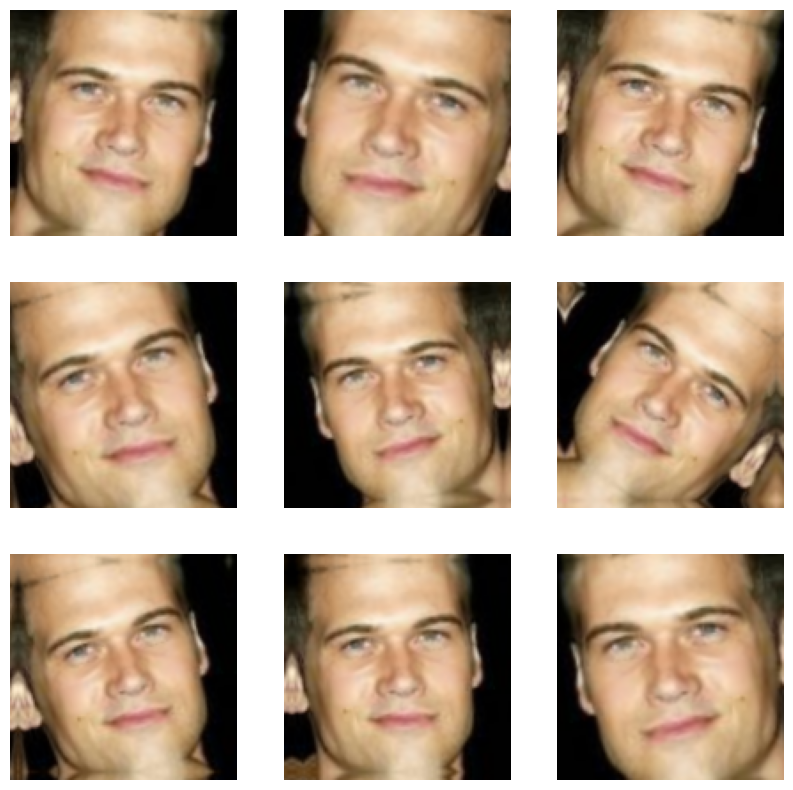

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [29]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,122 (8.09 MB)

 Trainable params: 2,121,122 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.8346 - loss: 0.4008 - val_accuracy: 0.9712 - val_loss: 0.0838
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.9529 - loss: 0.1282 - val_accuracy: 0.9850 - val_loss: 0.0524
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.9717 - loss: 0.0831 - val_accuracy: 0.9825 - val_loss: 0.0638
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.9753 - loss: 0.0721 - val_accuracy: 0.9862 - val_loss: 0.0379
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.9788 - loss: 0.0608 - val_accuracy: 0.9887 - val_loss: 0.0288
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.9837 - loss: 0.0557 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.9843 - loss: 0.0408 - val_accuracy: 0.9925 - val_loss: 0.0252
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.9849 - loss: 0

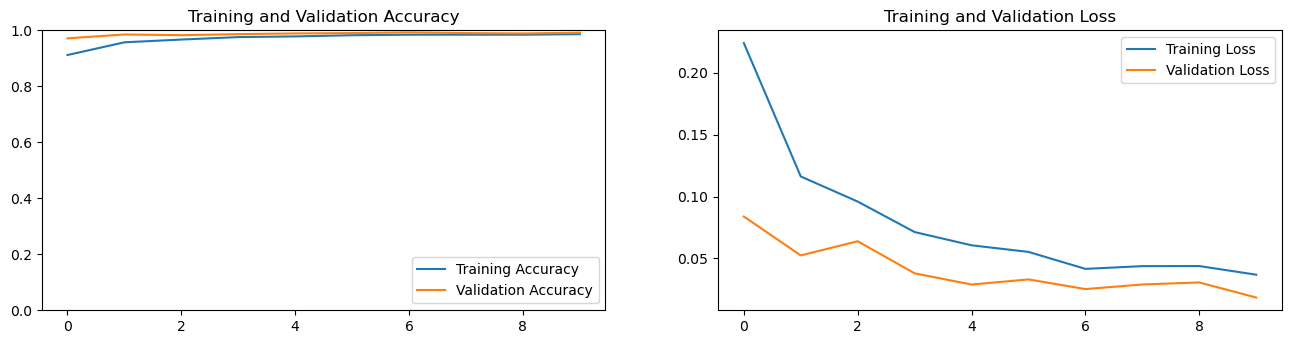

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

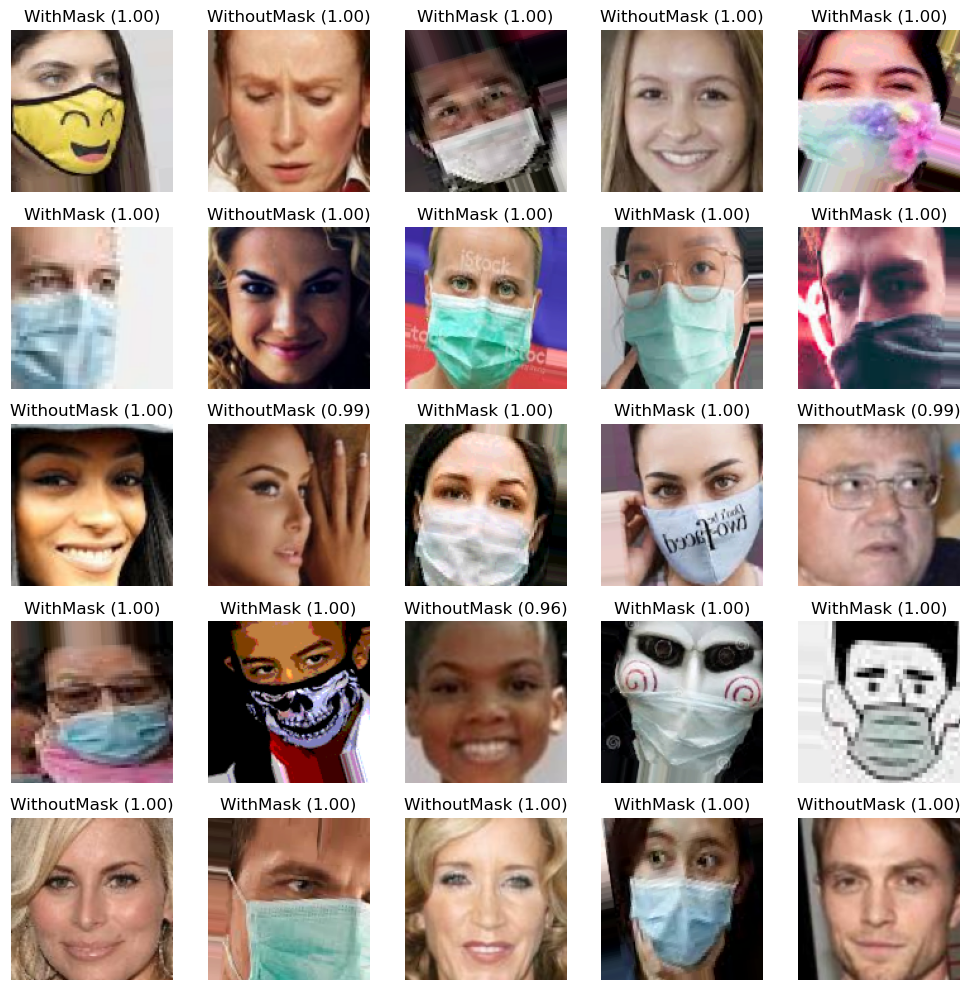

In [34]:
plt.figure(figsize=(10, 10))

# Keep track of how many images are plotted
num_images_to_plot = 25
current_plot = 0

for batch_index, (images, labels) in enumerate(test_ds):
    # Perform predictions on the current batch of images
    batch_predictions = model(images, training=False)  # Get predictions directly from the model
    
    for image_index in range(images.shape[0]):
        if current_plot >= num_images_to_plot:
            break  # Stop if we have plotted 25 images

        plt.subplot(5, 5, current_plot + 1)
        
        # Extract the image
        image = images[image_index].numpy().astype("uint8")
        
        # Get the prediction and score for the current image
        prediction_score = tf.nn.softmax(batch_predictions[image_index])
        predicted_label = class_labels[np.argmax(prediction_score)]
        confidence = tf.reduce_max(prediction_score).numpy()  # Extract the highest confidence
        
        # Plot the image
        plt.imshow(image)
        plt.axis("off")
        
        # Set the title with the predicted label and confidence
        plt.title(f"{predicted_label} ({confidence:.2f})")
        
        current_plot += 1

    if current_plot >= num_images_to_plot:
        break  # Stop after plotting 25 images

plt.tight_layout()
plt.show()


## Save model

In [44]:
model.save('facemask_model.keras')

## Test own photos

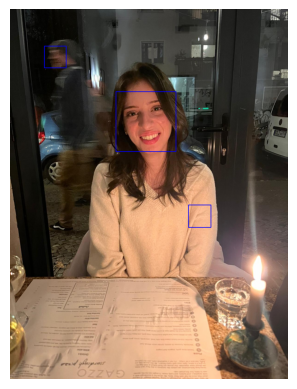

In [39]:
import cv2
import matplotlib.pyplot as plt

img_path = pathlib.Path('C:/Users/ronal/Downloads/mika.jpg')

# Cargar el modelo Haar Cascade para detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Cargar la imagen
image = cv2.imread(img_path)
# Convertir la imagen a escala de grises, ya que Haar Cascade funciona mejor en grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Dibujar un rectángulo alrededor de cada rostro detectado
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Rectángulo azul alrededor del rostro

# Mostrar la imagen con los rostros detectados
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Quita los ejes
plt.show()


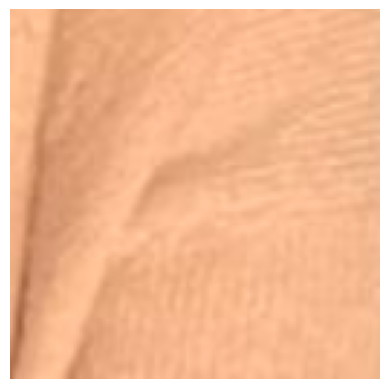

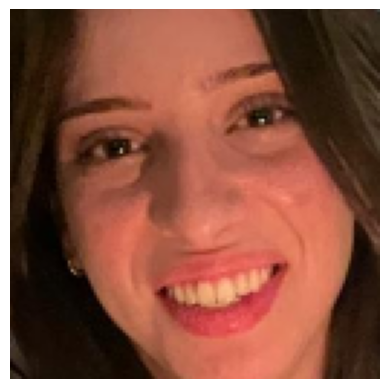

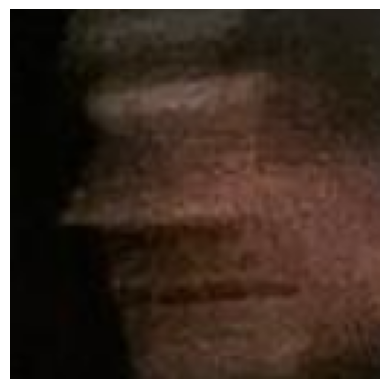

In [40]:

# Load the Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
image = cv2.imread(img_path)

# Convert to grayscale (Haar Cascade works best in grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Check if any faces were detected
if len(faces) > 0:
    for (x, y, w, h) in faces:
        # Crop the face portion from the original image 
        face = cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)
        face = cv2.resize(face,(128,128))
        # Display the cropped face
        plt.imshow(face)
        plt.axis('off')  # Hide axes
        plt.show()
        
        
        
        
        
else:
    print("No faces detected.")


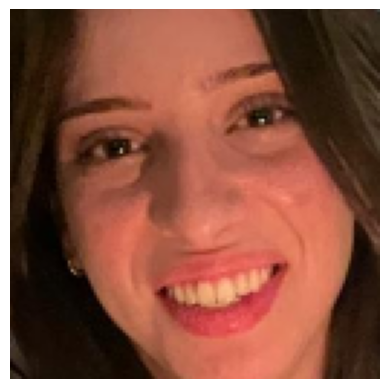

In [41]:
index = 1
face = cv2.cvtColor(image[faces[index][1]:faces[index][1]+faces[index][3], faces[index][0]:faces[index][0]+faces[index][2]], cv2.COLOR_BGR2RGB)
face = cv2.resize(face,(128,128))
plt.imshow(face)
plt.axis('off')  # Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


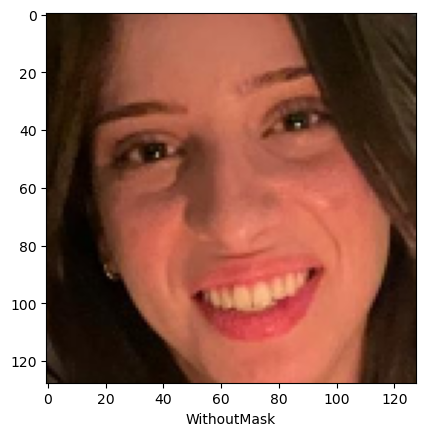

This image most likely belongs to WithoutMask with a 95.70 percent confidence.


In [42]:

img_array = tf.expand_dims(face, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.figure()
plt.imshow(face)
plt.grid(False)
plt.xlabel(class_labels[np.argmax(score)])  
plt.show()
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_labels[np.argmax(score)], 100 * np.max(score))
)